## Observations and Insights 
1. The correlation between mouse weight and average tumor volume is 0.84. This indicates that there is a strong positive linear relationship / strong positive correlation between the two. 
2. Based on the Capomulin treatment of Mouse ID: W914, we can see that there is a decrease of tumor size from timepoint 0 to 45 indicating that the Capomulin treatment was effective for Mouse ID: W914.
3. The Infubinol and Ceftamin treatment are less effective when compared to the Capomulin and Ramicane treatment. 

In [226]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on= "Mouse ID")
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [227]:
# Checking the number of mice in the DataFrame.
mice_count = merged_data["Mouse ID"].nunique()
mice_count

249

In [228]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#https://www.geeksforgeeks.org/python-pandas-dataframe-duplicated/
duplicate_mice = merged_data.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicate_mice

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [229]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_data[duplicate_mice]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [230]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Reference = https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
indexNames = merged_data[merged_data['Mouse ID'] == 'g989'].index
merged_data.drop(indexNames , inplace=True)
clean_merged_data = merged_data.reset_index()

# Checking the number of mice in the clean DataFrame.
clean_merged_data["Mouse ID"].nunique()


248

## Summary Statistics

In [231]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen using .agg
grouped_drug_df = clean_merged_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']}).round(3)

# Reset the index
grouped_drug_df = grouped_drug_df.reset_index()

grouped_drug_df


Drug Regimen Tumor Volume (mm3)                              
                             mean  median     var    std    sem
0    Capomulin             40.676  41.558  24.948  4.995  0.329
1     Ceftamin             52.591  51.776  39.290  6.268  0.470
2    Infubinol             52.885  51.821  43.129  6.567  0.492
3     Ketapril             55.236  53.699  68.554  8.280  0.604
4     Naftisol             54.332  52.509  66.173  8.135  0.596
5      Placebo             54.034  52.289  61.168  7.821  0.581
6     Propriva             52.321  50.446  43.852  6.622  0.544
7     Ramicane             40.217  40.673  23.487  4.846  0.321
8     Stelasyn             54.233  52.432  59.451  7.710  0.573
9    Zoniferol             53.237  51.818  48.533  6.967  0.516

In [232]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group = clean_merged_data.groupby(['Drug Regimen'])

# Calculate statistics for table

# Compute mean
mean_tumor_volume = drug_group['Tumor Volume (mm3)'].mean()
# Compute median
median_tumor_volume = drug_group['Tumor Volume (mm3)'].median()
# Compute variance
variance_tumor_volume = drug_group['Tumor Volume (mm3)'].var()
# Compute standard deviation
std_tumor_volume = drug_group['Tumor Volume (mm3)'].std()
# Compute standard error
sem_tumor_volume = drug_group['Tumor Volume (mm3)'].sem()

# Create dataframe 
drug_group_df = pd.DataFrame({"Tumor Volume Mean": mean_tumor_volume,
                             "Tumor Volume Median": median_tumor_volume,
                             "Tumor Volume Variance":variance_tumor_volume,
                             "Tumor Volume Standard Deviation": std_tumor_volume,
                             "Tumor Volume SEM": sem_tumor_volume})

# Format data
drug_group_df["Tumor Volume Mean"] = drug_group_df["Tumor Volume Mean"].map("{:.3f}".format)
drug_group_df["Tumor Volume Median"] = drug_group_df["Tumor Volume Median"].map("{:.3f}".format)
drug_group_df["Tumor Volume Variance"] = drug_group_df["Tumor Volume Variance"].map("{:.3f}".format)
drug_group_df["Tumor Volume Standard Deviation"] = drug_group_df["Tumor Volume Standard Deviation"].map("{:.3f}".format)
drug_group_df["Tumor Volume SEM"] = drug_group_df["Tumor Volume SEM"].map("{:.3f}".format)

drug_group_df


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar Plots

In [233]:
# Group by 'Drug Regimen'
drug_group = clean_merged_data.groupby(['Drug Regimen'])

# Count the number of mice
drug_group_count = drug_group['Mouse ID'].count()

# Create new dataframe with the mice count for reference 
drug_group_count_df = pd.DataFrame({"Number of Mice": drug_group_count })
drug_group_count_df

,Number of Mice
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


Text(0, 0.5, 'Mice Count')

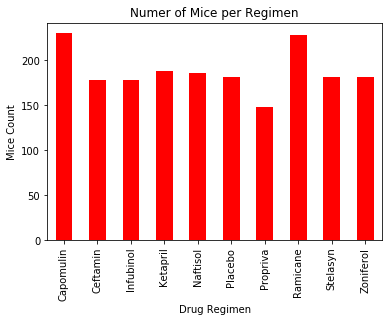

In [234]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
count_chart_pandas = drug_group_count_df.plot(kind='bar',rot=90, legend=False, title = "Numer of Mice per Regimen", color = "red")

# Add y-axis label and title
count_chart_pandas.set_ylabel('Mice Count')


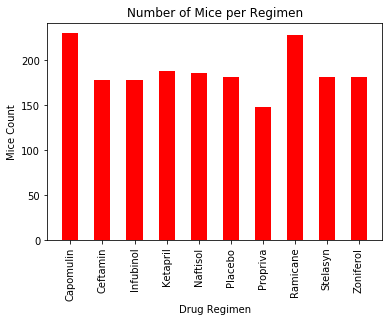

In [235]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

plt.bar(drug_group_count.index.values, drug_group_count.values, width = 0.5, color = "red")

# Rotate x-axis variables for viewing purposes
plt.xticks(rotation=90)

# Set the title and labels 
plt.title('Number of Mice per Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Mice Count')
plt.show()

## Pie Plots

In [236]:
# Generate pie plots using pandas and pyplot 

# Group by 'Sex' and look for unique mice/sex
sex_distribution = clean_merged_data.groupby(['Sex'])
sex_count = sex_distribution.nunique()['Mouse ID']

# Create new dataframe with sex distribution for reference
sex_distribution_df = pd.DataFrame({'Mice Count': sex_count})
sex_distribution_df

,Mice Count
Sex,
Female,123
Male,125


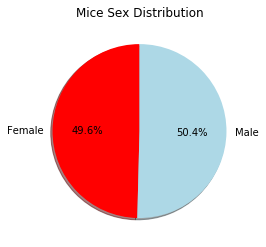

In [237]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['red', 'lightblue']
sex_distribution_pie_pandas = sex_distribution_df.plot.pie(y='Mice Count', autopct="%1.1f%%", colors = colors, title = 'Mice Sex Distribution', legend = False, shadow=True, startangle=90)

# Remove y-axis label
plt.ylabel("")

plt.show()


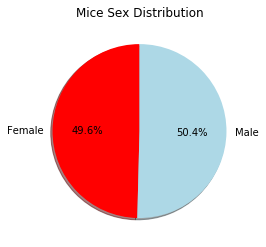

In [238]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create labels
labels = ['Female', 'Male']

# Create pie chart
plt.pie(sex_count, autopct="%1.1f%%", shadow = True, startangle = 90, labels=labels, colors = colors)

# Add title 
plt.title('Mice Sex Distribution')

plt.show()

## Quartiles, Outliers and Boxplots

In [239]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens(Capomulin, Ramicane, Infubinol and Ceftamin). 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_value = clean_merged_data.loc[(clean_merged_data['Drug Regimen'] == 'Capomulin')]
ramicane_value = clean_merged_data.loc[(clean_merged_data['Drug Regimen'] == 'Ramicane')]
infubinol_value = clean_merged_data.loc[(clean_merged_data['Drug Regimen'] == 'Infubinol')]
ceftamin_value = clean_merged_data.loc[(clean_merged_data['Drug Regimen'] == 'Ceftamin')]

# Calculate the final tumor volume of each mouse using .max()
capomulin_final = capomulin_value.groupby('Mouse ID').max()
ramicane_final = ramicane_value.groupby('Mouse ID').max()
infubinol_final = infubinol_value.groupby('Mouse ID').max()
ceftamin_final = ceftamin_value.groupby('Mouse ID').max()

# Create a dataframe for the max tumor volume for each treatment
capomulin_df = pd.DataFrame(capomulin_final)
ramicane_df = pd.DataFrame(ramicane_final)
infubinol_df = pd.DataFrame(infubinol_final)
ceftamin_df = pd.DataFrame(ceftamin_final)


In [240]:
# Calculate by using the ['Tumor Volume (mm3)'] column

# Calculations for Capomulin
tumors_capomulin = capomulin_df["Tumor Volume (mm3)"]
quartiles = tumors_capomulin.quantile([.25,.5,.75]).round(2)
lowerq = quartiles[0.25].round(2)
upperq = quartiles[0.75].round(2)
iqr = round(upperq-lowerq, 2)

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"--------------------------------------------------------")

# Calculations for Ramicane 
tumors_ramicane = ramicane_df["Tumor Volume (mm3)"]
quartiles = tumors_ramicane.quantile([.25,.5,.75]).round(2)
lowerq = quartiles[0.25].round(2)
upperq = quartiles[0.75].round(2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"--------------------------------------------------------")


# Calculations for Infubinol
tumors_infubinol = infubinol_df["Tumor Volume (mm3)"]
quartiles = tumors_infubinol.quantile([.25,.5,.75]).round(2)
lowerq = quartiles[0.25].round(2)
upperq = quartiles[0.75].round(2)
iqr = round(upperq-lowerq, 2)

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"--------------------------------------------------------")

# Calculations for Ceftamin
tumors_ceftamin = ceftamin_df["Tumor Volume (mm3)"]
quartiles = tumors_ceftamin.quantile([.25,.5,.75]).round(2)
lowerq = quartiles[0.25].round(2)
upperq = quartiles[0.75].round(2)
iqr = round(upperq-lowerq, 2)

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"--------------------------------------------------------")


The lower quartile of Capomulin is: 45.0
The upper quartile of Capomulin is: 46.75
The interquartile range of Capomulin is: 1.75
The the median of Capomulin is: 45.89 
Values below 42.38 could be outliers.
Values above 49.38 could be outliers.
--------------------------------------------------------
The lower quartile of Ramicane is: 45.0
The upper quartile of Ramicane is: 46.34
The interquartile range of Ramicane is: 1.34
The the median of Ramicane is: 45.52 
Values below 42.99 could be outliers.
Values above 48.35 could be outliers.
--------------------------------------------------------
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.17 
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.
--------------------------------------------------------
The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.3
The interquartile 

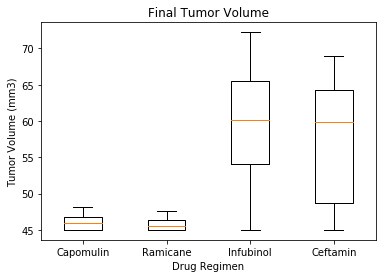

In [241]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_tumor_volume = [tumors_capomulin, tumors_ramicane, tumors_infubinol, tumors_ceftamin]

# Create labels
labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create box plot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(final_tumor_volume, labels=labels)
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

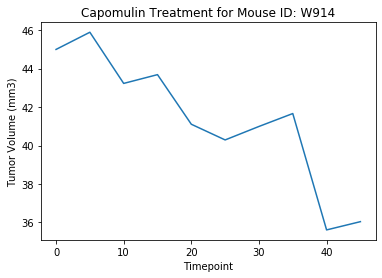

In [242]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Pick any mouse treated with Capomulin (w914), use .loc to find the values

capomulin_mouse_w914 = capomulin_value.loc[capomulin_value['Mouse ID'] == 'w914',:]

# Get the timepoint values 
w914_timepoint = capomulin_mouse_w914['Timepoint']


# Get the tumor volume
w914_tumor_volume = capomulin_mouse_w914['Tumor Volume (mm3)']



# Generate line plot 
plt.plot(w914_timepoint, w914_tumor_volume)
plt.title('Capomulin Treatment for Mouse ID: W914')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show

Text(0, 0.5, 'Average Tumor Volume (mm3)')

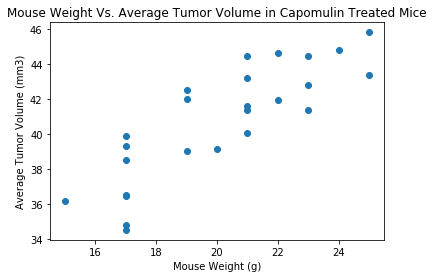

In [243]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Groupby Mouse ID
capomulin_average = capomulin_value.groupby(['Mouse ID']).mean()

# Get weight
capomulin_weight = capomulin_average['Weight (g)']

# Get volume
capomulin_volume = capomulin_average['Tumor Volume (mm3)']

# Generate scatterplot 
plt.scatter(capomulin_weight, capomulin_volume, marker ='o')

# Create labels 
plt.title('Mouse Weight Vs. Average Tumor Volume in Capomulin Treated Mice')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84
---------------------------------------------------------------------
LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.12754359033201337)
---------------------------------------------------------------------
Mouse ID
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
i557    44.458713
i738    40.640954
j119    43.504273
j246    41.595394
l509    41.595394
l897    39.686515
m601    37.777635
m957    39.686515
r157    45.413153
r554    37.777635
r944    45.413153
s185    37.777635
s710    43.504273
t565    37.777635
u364    37.777635
v923    41.595394
w150    43.504273
w914    41.595394
x401    35.868756
y793    37.777635
Name: Weight (g), dtype: float64
---------------------------------------------------------------------


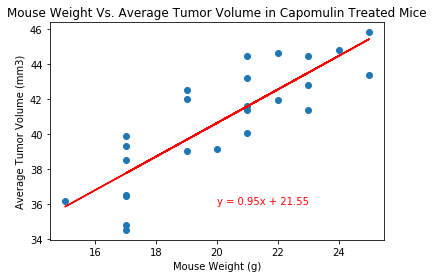

In [244]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# To calculate correlation coefficient use correlation = st.pearsonr()
# Reference https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
correlation = st.pearsonr(capomulin_weight, capomulin_volume)

print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")
print(f"---------------------------------------------------------------------")

# To calculate linear regression use st.linregress() to get all values
# Reference https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
regression_model = st.linregress(capomulin_weight, capomulin_volume)
print(regression_model)
print(f"---------------------------------------------------------------------")
(slope, intercept, rvalue, pvalue, stderr) = regression_model

# Use the scatterplot and add the slope and intercept y=mx+b
regression_value = slope * capomulin_weight + intercept 
print(regression_value)
print(f"---------------------------------------------------------------------")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capomulin_weight, capomulin_volume)
plt.plot(capomulin_weight,regression_value,"r-")
plt.annotate(line_eq,(20,36),fontsize=10,color="red")
plt.title('Mouse Weight Vs. Average Tumor Volume in Capomulin Treated Mice')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()